In [1]:
import cv2
import numpy as np

import sys
sys.path.append('..')
from opencv_course import ImageUtil

In [2]:
def dodgeNaive(image, mask):
    # determine the shape of the input image
    width, height = image.shape[:2]
 
    # prepare output argument with same size as image
    blend = np.zeros((width, height), np.uint8)
 
    for col in range(width):
        for row in range(height):
            # do for every pixel
            if mask[col, row] == 255:
                # avoid division by zero
                blend[col, row] = 255
            else:
                # shift image pixel value by 8 bits
                # divide by the inverse of the mask
                tmp = (image[col, row] << 8) / (255 - mask)
                # print('tmp={}'.format(tmp.shape))
                # make sure resulting value stays within bounds
                if tmp.any() > 255:
                    tmp = 255
                    blend[col, row] = tmp
 
    return blend

In [3]:
def dodgeV2(image, mask):
    return cv2.divide(image, 255 - mask, scale=256)

In [4]:
def burnV2(image, mask):
    return 255 - cv2.divide(255 - image, 255 - mask, scale=256)

<Figure size 720x720 with 0 Axes>

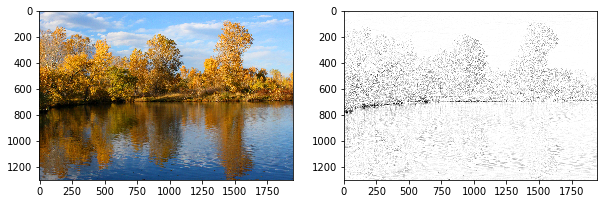

In [6]:
src_image_name="images/lake.jpg"
img_rgb = cv2.imread(src_image_name)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
# 读取图片时直接转换操作
# img_gray = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)

img_gray_inv = 255 - img_gray
img_blur = cv2.GaussianBlur(img_gray_inv, ksize=(21, 21), sigmaX=0, sigmaY=0)
img_blend = dodgeV2(img_gray, img_blur)


ImageUtil.imshow([img_rgb, img_blend], columns = 2)